<a href="https://colab.research.google.com/github/Ms-Ainebyona/Chest-Opacity-project/blob/colab-main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import os
import numpy as np
import PIL
import PIL.Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import Rescaling



In [38]:
img=image.load_img("/content/drive/MyDrive/Deep learning/training/Normal/normal_116.png")

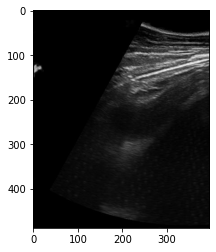

In [39]:
plt.imshow(img)

In [40]:
cv2.imread("/content/drive/MyDrive/Deep learning/training/Normal/normal_116.png").shape

(488, 395, 3)

In [41]:

train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)



In [42]:
training_data=train.flow_from_directory("/content/drive/MyDrive/Deep learning/training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 531 images belonging to 2 classes.


In [43]:
validation_data=validation.flow_from_directory("/content/drive/MyDrive/Deep learning/Validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 120 images belonging to 2 classes.


In [46]:
image_size = 488,395

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(image_size, image_size),
  layers.Rescaling(1./255)
])

In [47]:
training_data.class_indices

{'Normal': 0, 'Sick': 1}

In [48]:
training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
model=tf.keras.models.Sequential([tf.keras.layers.Convolution2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Convolution2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Convolution2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [55]:
# Model compilation
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [56]:
model_fit=model.fit(training_data,
                    steps_per_epoch=3,
                    epochs=10,
                    validation_data=validation_data
                
                    )

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 2.5716 - accuracy: 0.7778 - val_loss: 0.9987 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.3209 - accuracy: 0.3333 - val_loss: 0.6789 - val_accuracy: 0.6833
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.7219 - accuracy: 0.4444 - val_loss: 0.6624 - val_accuracy: 0.7083
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.6615 - accuracy: 0.7778 - val_loss: 0.6206 - val_accuracy: 0.5667
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.6747 - accuracy: 0.6667 - val_loss: 0.5960 - val_accuracy: 0.7750
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.6210 - accuracy: 0.5556 - val_loss: 0.5290 - val_accuracy: 0.6917
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.3252 - accuracy: 0.8889 - val_loss: 0.3583 - val_accuracy: 0.8417
Epoch 8/10
3/3 [=========================

In [32]:
dir_path="/content/drive/MyDrive/Deep learning/unknown_images"

In [33]:
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i)
  print(i)

 

31.png
30.png
3.png
29.png
28.png
26.png
23.png
27.png
24.png
25.png
22.png
21.png
20.png
2.png
19.png
16.png
14.png
17.png
15.png
18.png
13.png
12.png
11.png
10.png
1.png
6.png
7.png
8.png
9.png
50.png
5.png
49.png
48.png
47.png
46.png
44.png
43.png
42.png
41.png
45.png
40.png
4.png
39.png
38.png
37.png
32.png
34.png
36.png
33.png
35.png


In [34]:
#plt.imshow(img)
plt.show(img)

In [35]:
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
if val==0:
  print("Normal")
else:
  print("Sick")


ValueError: ignored